In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geolite2 import  geolite2
import seaborn as sns

In [2]:
feb9 = pd.read_csv('/Users/sa24/Capstone/The-CyberChase/Raw Data/2023-02-09.csv')

In [3]:
feb9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578304 entries, 0 to 578303
Data columns (total 84 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     578304 non-null  object 
 1   Src IP                      578304 non-null  object 
 2   Src Port                    578304 non-null  int64  
 3   Dst IP                      578304 non-null  object 
 4   Dst Port                    578304 non-null  int64  
 5   Protocol                    578304 non-null  int64  
 6   Timestamp                   578304 non-null  object 
 7   Flow Duration               578304 non-null  int64  
 8   Total Fwd Packet            578304 non-null  int64  
 9   Total Bwd packets           578304 non-null  int64  
 10  Total Length of Fwd Packet  578304 non-null  float64
 11  Total Length of Bwd Packet  578304 non-null  float64
 12  Fwd Packet Length Max       578304 non-null  float64
 13  Fwd Packet Len

In [4]:
#Select the objects and integers
type_object = feb9.select_dtypes(include=["object", "int64"])
type_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578304 entries, 0 to 578303
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Flow ID              578304 non-null  object
 1   Src IP               578304 non-null  object
 2   Src Port             578304 non-null  int64 
 3   Dst IP               578304 non-null  object
 4   Dst Port             578304 non-null  int64 
 5   Protocol             578304 non-null  int64 
 6   Timestamp            578304 non-null  object
 7   Flow Duration        578304 non-null  int64 
 8   Total Fwd Packet     578304 non-null  int64 
 9   Total Bwd packets    578304 non-null  int64 
 10  Fwd PSH Flags        578304 non-null  int64 
 11  Bwd PSH Flags        578304 non-null  int64 
 12  Fwd URG Flags        578304 non-null  int64 
 13  Bwd URG Flags        578304 non-null  int64 
 14  Fwd Header Length    578304 non-null  int64 
 15  Bwd Header Length    578304 non-nu

In [8]:
feb9.shape

(578304, 84)

In [9]:
feb9.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_90626/1741979426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feb9, x="Label", palette="plasma")


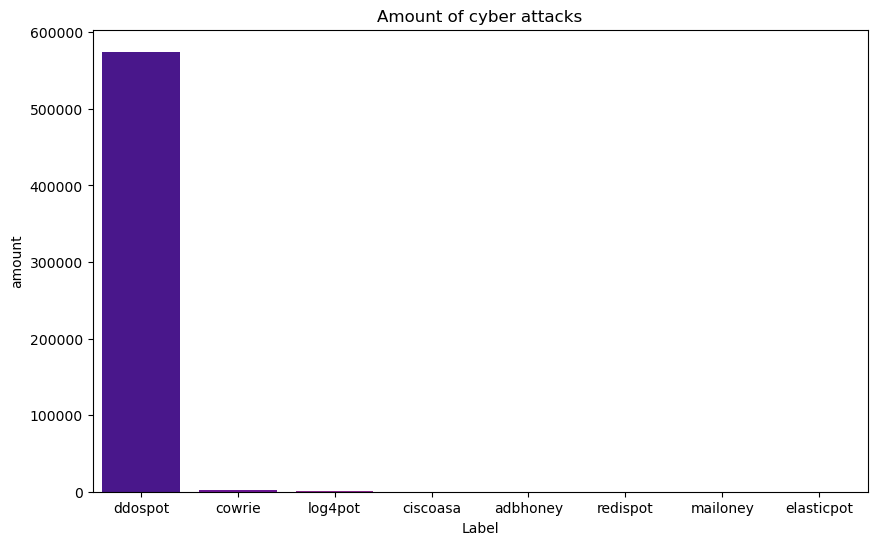

In [10]:
#create a bar plot to plot the Label
plt.figure(figsize=(10,6))
sns.countplot(data=feb9, x="Label", palette="plasma")
plt.xlabel("Label")
plt.ylabel("amount")
plt.title("Amount of cyber attacks")
plt.show()

Majority of the attacks are ddospot attacks. This will most likely show a lot of packets being sent to cause denial of service

In [11]:
feb9["Protocol"].value_counts().to_frame()

,count
Protocol,
17,574676
6,3628


/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_90626/3245830103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feb9, x="Protocol", palette="plasma")


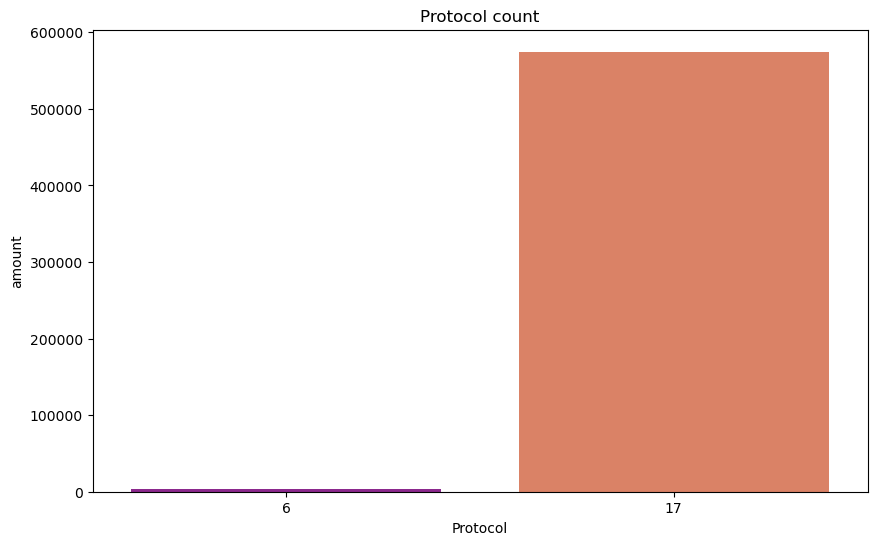

In [14]:
#create a bar plot to plot the Label
plt.figure(figsize=(10,6))
sns.countplot(data=feb9, x="Protocol", palette="plasma")
plt.xlabel("Protocol")
plt.ylabel("amount")
plt.title("Protocol count")
plt.show()

- The majority of packets were sent through protocol 17, which delivers packets faster but is less secure and doesn't guarantee that the packet will be delivered

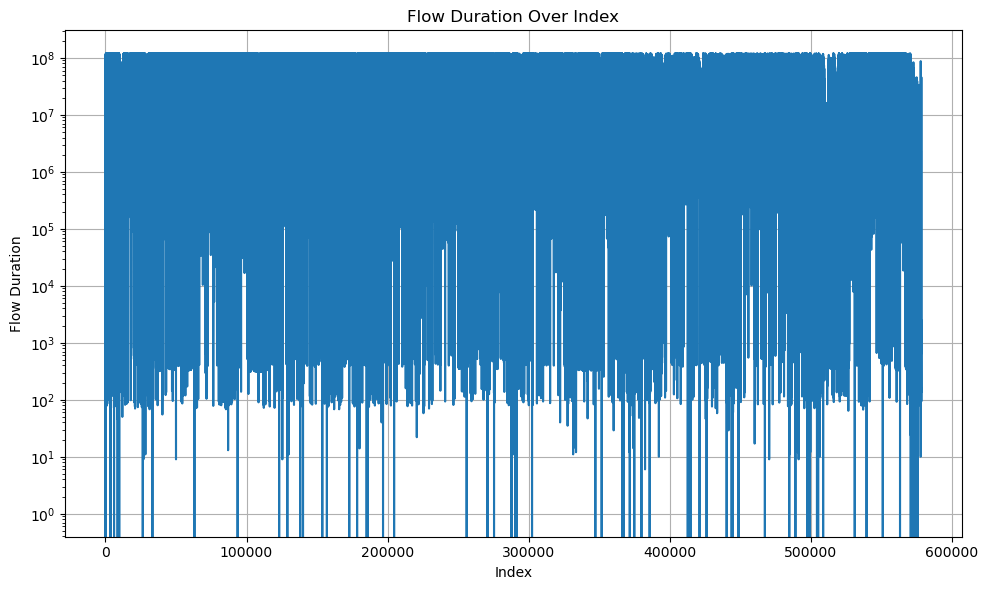

In [16]:
feb9['Flow Duration'].plot(kind='line', figsize=(10, 6))

plt.title('Flow Duration Over Index')
plt.xlabel('Index')
plt.ylabel('Flow Duration')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

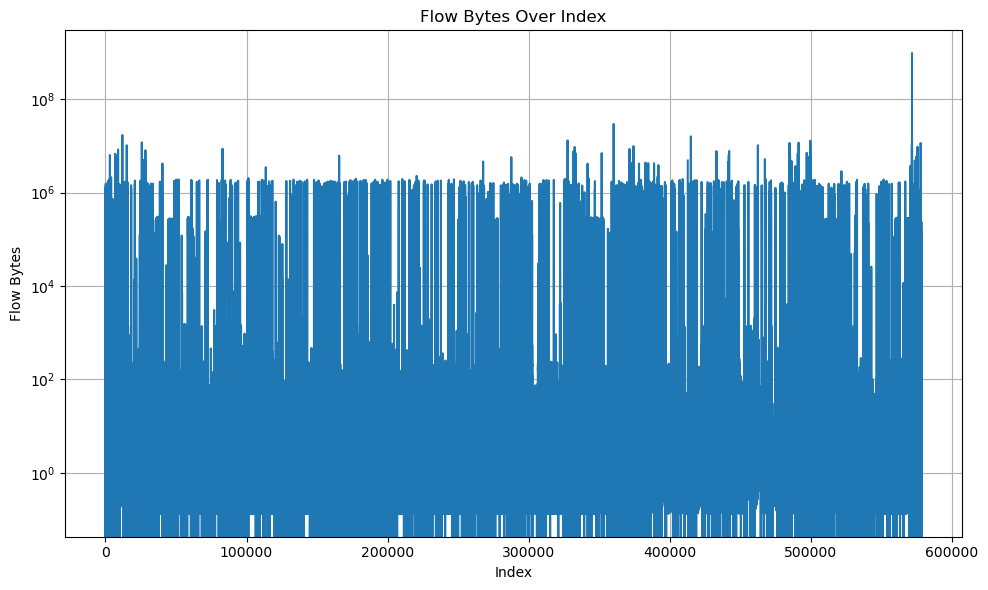

In [17]:
feb9['Flow Bytes/s'].plot(kind='line', figsize=(10, 6))

plt.yscale('log')
plt.title('Flow Bytes Over Index')
plt.xlabel('Index')
plt.ylabel('Flow Bytes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Flow Details

The Flow shows the rate of packets being sent. The fact that there are so many spikes and the durations is constanly high makes sense with a Denial of Service attack 

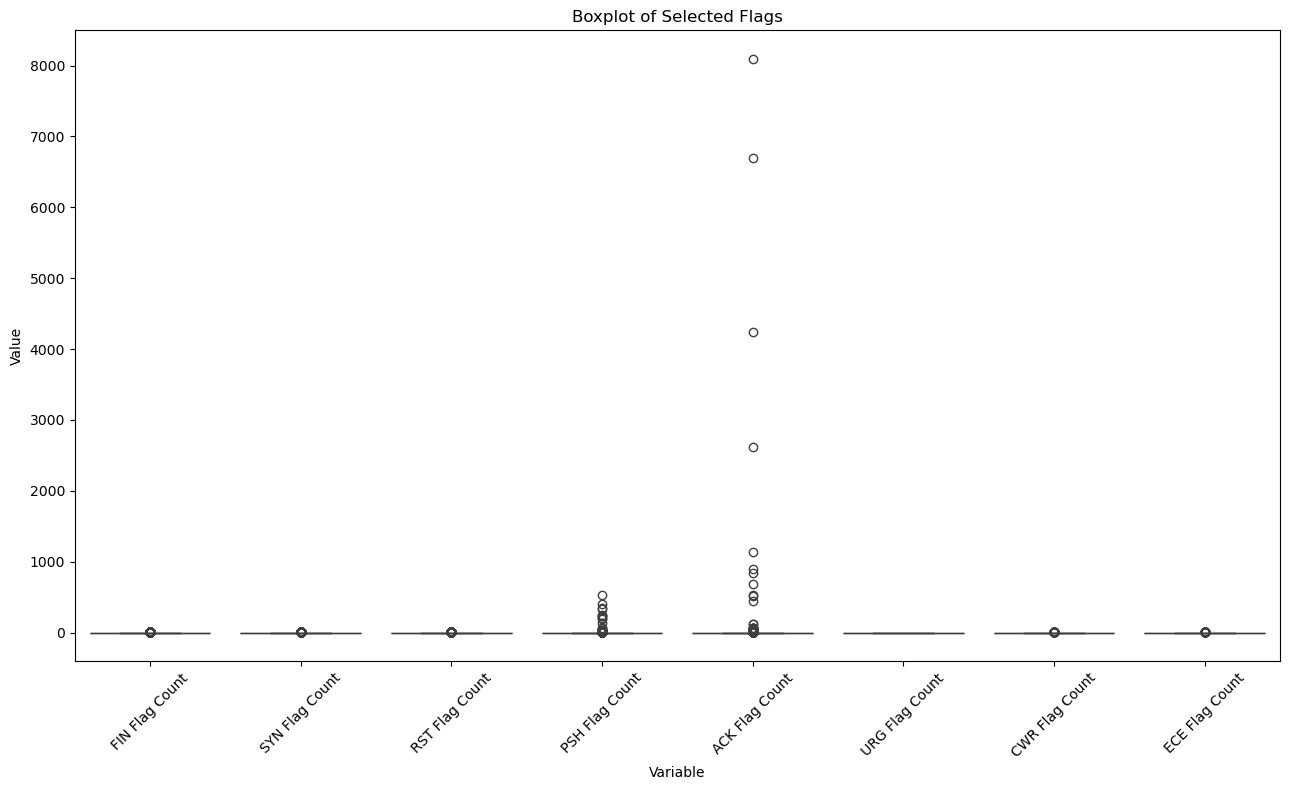

In [18]:
flags = ['FIN Flag Count' , 'SYN Flag Count' , 'RST Flag Count' , 'PSH Flag Count' , 'ACK Flag Count' , 'URG Flag Count' , 'CWR Flag Count' , 'ECE Flag Count']

# Melt data for boxplot
df_melted = feb9[flags].melt(var_name='Variable', value_name='Value')

# Create the figure
plt.figure(figsize=(13, 8))

# Plot the boxplot
sns.boxplot(data=df_melted, x='Variable', y='Value')
plt.title('Boxplot of Selected Flags')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [20]:
import geoip2.database
reader = geoip2.database.Reader('/Users/sa24/Capstone/The-CyberChase/Raw Data/GeoLite2-City.mmdb')
locations_2 = []
for ip in feb9['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations_2.append(location_str)
feb9['Locations'] = locations_2
feb9['Locations']

0                                             United States
1                                                   Moldova
2                                             United States
3                                                     China
4         Error: The address 10.1.0.4 is not in the data...
                                ...                        
578299                                        United States
578300    Error: The address 10.1.0.4 is not in the data...
578301                                        United States
578302                                        United States
578303                                                China
Name: Locations, Length: 578304, dtype: object

In [21]:
feb9["Locations"].value_counts().to_frame()


,count
Locations,
United States,139346
Hong Kong,137567
China,102663
Germany,47367
Italy,23797
...,...
Error: The address 102.193.82.65 is not in the database.,1
Error: The address 23.140.10.51 is not in the database.,1
Comoros,1


In [22]:
locations_3 = []
for ip in feb9['Dst IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations_3.append(location_str)
feb9['Locations'] = locations_3
feb9['Locations']

0         Error: The address 10.1.0.4 is not in the data...
1         Error: The address 10.1.0.4 is not in the data...
2         Error: The address 10.1.0.4 is not in the data...
3         Error: The address 10.1.0.4 is not in the data...
4                                                     China
                                ...                        
578299    Error: The address 10.1.0.4 is not in the data...
578300                                        United States
578301    Error: The address 10.1.0.4 is not in the data...
578302    Error: The address 10.1.0.4 is not in the data...
578303    Error: The address 10.1.0.4 is not in the data...
Name: Locations, Length: 578304, dtype: object

In [23]:
feb9["Locations"].value_counts().to_frame()

,count
Locations,
Error: The address 10.1.0.4 is not in the database.,577456
United States,382
China,181
Bulgaria,55
France,41
The Netherlands,25
Russia,24
Germany,19
United Kingdom,15


# Sender Vs Receiver

The Country sending the most packets are coming from the United States and the Destination recieving most of those packets is an ip address called 10.1.0.4 which is a IP used for malicious activities 

# February 10

In [24]:
feb10 = pd.read_csv('/Users/sa24/Capstone/The-CyberChase/Raw Data/2023-02-10.csv')

In [25]:
feb10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66303 entries, 0 to 66302
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     66303 non-null  object 
 1   Src IP                      66303 non-null  object 
 2   Src Port                    66303 non-null  int64  
 3   Dst IP                      66303 non-null  object 
 4   Dst Port                    66303 non-null  int64  
 5   Protocol                    66303 non-null  int64  
 6   Timestamp                   66303 non-null  object 
 7   Flow Duration               66303 non-null  int64  
 8   Total Fwd Packet            66303 non-null  int64  
 9   Total Bwd packets           66303 non-null  int64  
 10  Total Length of Fwd Packet  66303 non-null  float64
 11  Total Length of Bwd Packet  66303 non-null  float64
 12  Fwd Packet Length Max       66303 non-null  float64
 13  Fwd Packet Length Min       663

In [26]:
feb10.shape

(66303, 84)

/var/folders/fz/fjrs1yms7rbcd_w7wg96j1fm0000gn/T/ipykernel_90626/1776610805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feb10, x="Label", palette="plasma")


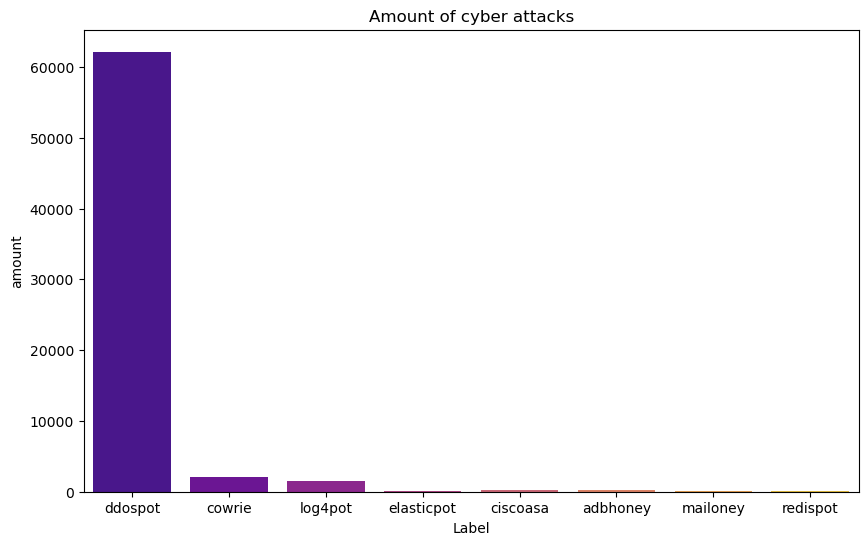

In [27]:
#create a bar plot to plot the Label
plt.figure(figsize=(10,6))
sns.countplot(data=feb10, x="Label", palette="plasma")
plt.xlabel("Label")
plt.ylabel("amount")
plt.title("Amount of cyber attacks")
plt.show()

In [30]:
feb10["Label"].value_counts().to_frame()

,count
Label,
ddospot,62158
cowrie,2026
log4pot,1456
adbhoney,263
ciscoasa,230
elasticpot,75
mailoney,59
redispot,36


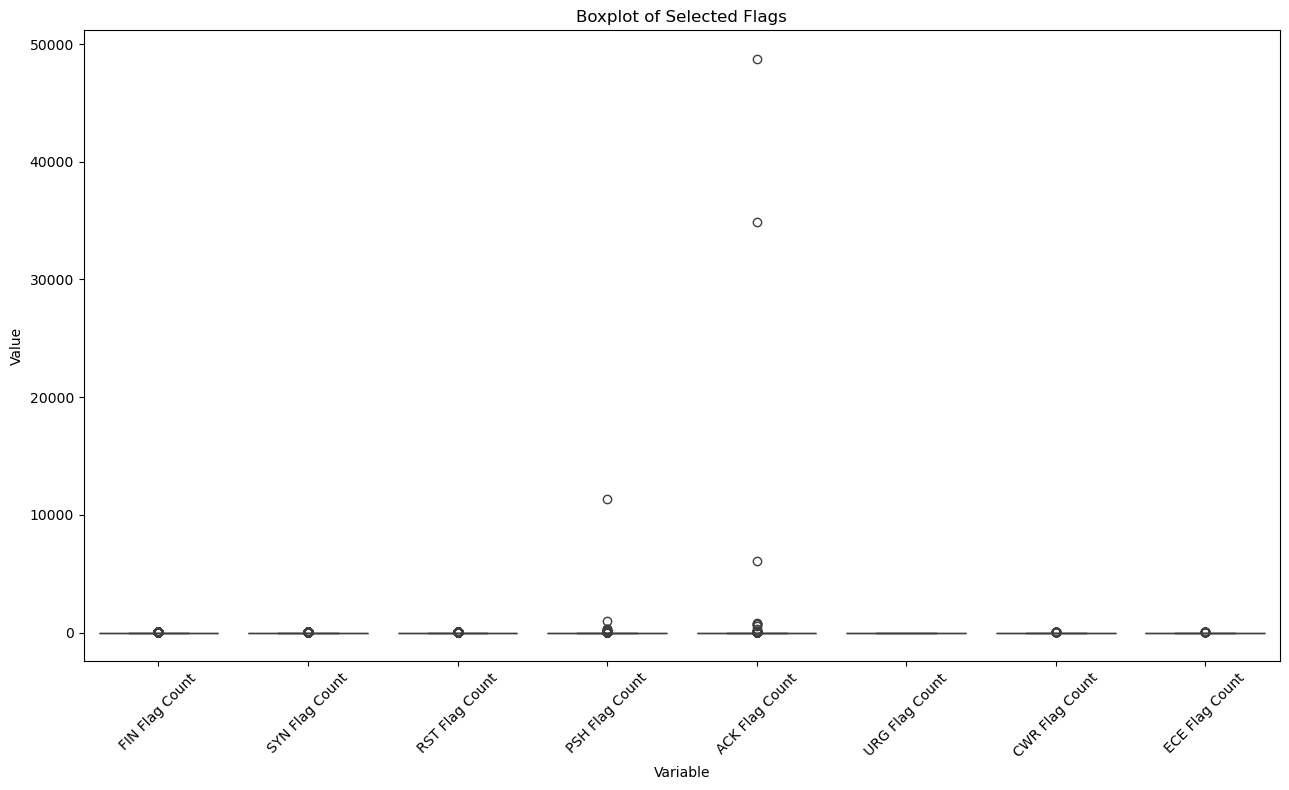

In [31]:
flags = ['FIN Flag Count' , 'SYN Flag Count' , 'RST Flag Count' , 'PSH Flag Count' , 'ACK Flag Count' , 'URG Flag Count' , 'CWR Flag Count' , 'ECE Flag Count']

# Melt data for boxplot
df_melted = feb10[flags].melt(var_name='Variable', value_name='Value')

# Create the figure
plt.figure(figsize=(13, 8))

# Plot the boxplot
sns.boxplot(data=df_melted, x='Variable', y='Value')
plt.title('Boxplot of Selected Flags')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

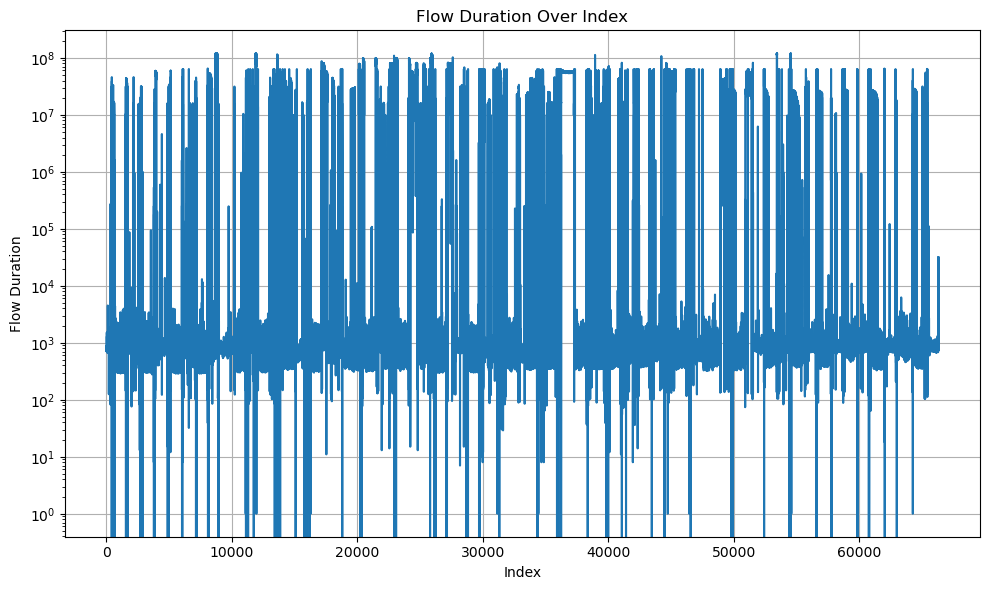

In [32]:
feb10['Flow Duration'].plot(kind='line', figsize=(10, 6))

plt.title('Flow Duration Over Index')
plt.xlabel('Index')
plt.ylabel('Flow Duration')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

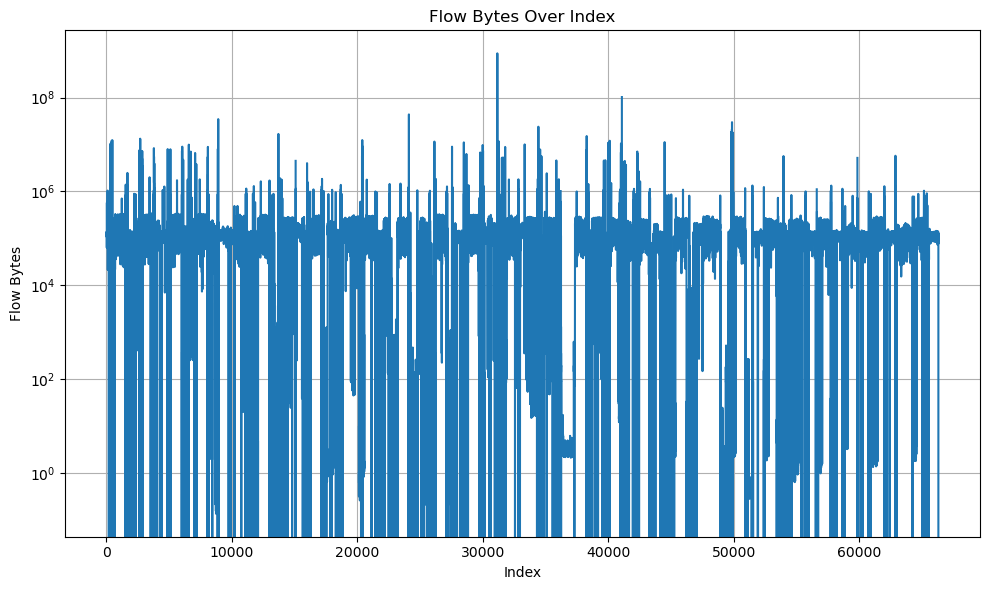

In [33]:
feb10['Flow Bytes/s'].plot(kind='line', figsize=(10, 6))

plt.yscale('log')
plt.title('Flow Bytes Over Index')
plt.xlabel('Index')
plt.ylabel('Flow Bytes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
import geoip2.database
reader = geoip2.database.Reader('/Users/sa24/Capstone/The-CyberChase/Raw Data/GeoLite2-City.mmdb')
locations_2 = []
for ip in feb10['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations_2.append(location_str)
feb10['Locations'] = locations_2
feb10['Locations']

0                                                   France
1                                                  Germany
2                                                    Japan
3                                           United Kingdom
4        Error: The address 0.204.103.73 is not in the ...
                               ...                        
66298                                      The Netherlands
66299                                              Finland
66300                                               Angola
66301                                               Canada
66302                                                China
Name: Locations, Length: 66303, dtype: object

In [36]:
feb10["Locations"].value_counts().to_frame()

,count
Locations,
United States,22674
China,11543
Japan,3163
Hong Kong,3058
Singapore,2312
...,...
Error: The address 131.143.26.42 is not in the database.,1
Error: The address 199.241.45.63 is not in the database.,1
Error: The address 0.74.36.37 is not in the database.,1


In [39]:
locations_3 = []
for ip in feb10['Dst IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations_3.append(location_str)
feb10['Locations'] = locations_3
feb10['Locations']

0        Error: The address 10.1.0.4 is not in the data...
1        Error: The address 10.1.0.4 is not in the data...
2        Error: The address 10.1.0.4 is not in the data...
3        Error: The address 10.1.0.4 is not in the data...
4        Error: The address 10.1.0.4 is not in the data...
                               ...                        
66298    Error: The address 10.1.0.4 is not in the data...
66299    Error: The address 10.1.0.4 is not in the data...
66300    Error: The address 10.1.0.4 is not in the data...
66301    Error: The address 10.1.0.4 is not in the data...
66302    Error: The address 10.1.0.4 is not in the data...
Name: Locations, Length: 66303, dtype: object

In [40]:
feb10["Locations"].value_counts().to_frame()

,count
Locations,
Error: The address 10.1.0.4 is not in the database.,65251
United States,465
China,262
Bulgaria,60
France,43
Türkiye,41
United Kingdom,29
Hong Kong,16
South Korea,14
